<a href="https://colab.research.google.com/github/Andribi/A2MF_AP/blob/main/UTKFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROVA TEST



In [ ]:
# Source: https://pytorch.org/hub/facebookresearch_pytorch-gan-zoo_pgan/ 

import torch
use_gpu = True if torch.cuda.is_available() else False

# trained on high-quality celebrity faces "celebA" dataset
# this model outputs 512 x 512 pixel images
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=use_gpu)
# this model outputs 256 x 256 pixel images
# model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
#                        'PGAN', model_name='celebAHQ-256',
#                        pretrained=True, useGPU=use_gpu)



Downloading: "https://github.com/facebookresearch/pytorch_GAN_zoo/archive/hub.zip" to /root/.cache/torch/hub/hub.zip
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/PGAN/celebaHQ16_december_s7_i96000-9c72988c.pth" to /root/.cache/torch/hub/checkpoints/celebaHQ16_december_s7_i96000-9c72988c.pth


  0%|          | 0.00/264M [00:00<?, ?B/s]

Average network found !


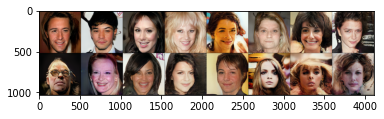

In [ ]:
num_images = 16
# noise, _ = model.buildNoiseData(num_images, inputlabels)

noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)

# let's plot these images using torchvision and matplotlib
import matplotlib.pyplot as plt
import torchvision
grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1), scale_each=True, normalize=True)
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
plt.show()

## Creazione dataset torch like


In [1]:
# FAIRFACE CLONE

import os

!git clone https://github.com/Andribi/A2MF_AP.git

Cloning into 'A2MF_AP'...
remote: Enumerating objects: 241738, done.
remote: Counting objects: 100% (46614/46614), done.
remote: Compressing objects: 100% (46607/46607), done.
remote: Total 241738 (delta 24), reused 46585 (delta 7), pack-reused 195124
Receiving objects: 100% (241738/241738), 2.13 GiB | 28.17 MiB/s, done.
Resolving deltas: 100% (41/41), done.
Checking out files: 100% (242751/242751), done.


In [2]:
# FACEBOOK PGAN CLONE
!git clone https://github.com/facebookresearch/pytorch_GAN_zoo.git

Cloning into 'pytorch_GAN_zoo'...
remote: Enumerating objects: 1523, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 1523 (delta 17), reused 13 (delta 4), pack-reused 1495
Receiving objects: 100% (1523/1523), 2.06 MiB | 7.64 MiB/s, done.
Resolving deltas: 100% (977/977), done.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import torch
use_gpu = True if torch.cuda.is_available() else False

In [4]:
# GLOBAL VARS

UTKFACE_LABELS_PATH = '/content/A2MF_AP/UTKFace/utkface.json'
UTKFACE_PATH = '/content/A2MF_AP/UTKFace/utkface'
UTKFACE_SK_PATH = '/content/A2MF_AP/UTKFace/utkface_sk'

# FAIRFACE_PATH = "/content/A2MF_AP/fairface/"
# ATTRIB_DICT_PATH = "/content/drive/MyDrive/train_attr.json"

In [5]:
# IMPORTS

import os 
import pandas as pd 
import matplotlib.pyplot as plt
import json 
import numpy as np

In [109]:
# CREATE DATAFRAME

with open(UTKFACE_LABELS_PATH) as utkface:
    utkface_dict = json.load(utkface)

utkface_df = pd.DataFrame.from_dict(utkface_dict, orient='index')
utkface_df.head(5)

,age,gender,race
100_0_0_20170112213500903.jpg.chip.jpg,100,0,0.0
100_0_0_20170112215240346.jpg.chip.jpg,100,0,0.0
100_1_0_20170110183726390.jpg.chip.jpg,100,1,0.0
100_1_0_20170112213001988.jpg.chip.jpg,100,1,0.0
100_1_0_20170112213303693.jpg.chip.jpg,100,1,0.0


In [110]:
# MISSING VALUES

print('Percentage of missing values:', round((utkface_df.isna().sum().sum() / utkface_df.shape[0]) * 100 , 2), '%')
nan_vals = utkface_df[utkface_df.isna().any(axis=1)]
utkface_df = utkface_df.dropna()
print('Percentage of missing values after drop:', round((utkface_df.isna().sum().sum() / utkface_df.shape[0]) * 100 , 2), '%')

Percentage of missing values: 0.01 %
Percentage of missing values after drop: 0.0 %


In [111]:
# AGE CLASSES

utkface_df['race'] = utkface_df['race'].apply(np.int64)
utkface_df.loc[utkface_df.age < 15, 'age'] = 0
utkface_df.loc[((utkface_df.age >= 15) & (utkface_df.age <25)), 'age'] = 1
utkface_df.loc[((utkface_df.age >= 25) & (utkface_df.age <65)), 'age'] = 2
utkface_df.loc[((utkface_df.age >= 65) & (utkface_df.age <85)), 'age'] = 3
utkface_df.loc[utkface_df.age >= 85, 'age'] = 4

In [112]:
utkface_df.describe()

,age,gender,race
count,23669.000000,23669.000000,23669.000000
mean,1.656175,0.477587,1.269678
std,0.878160,0.499508,1.345623
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000
75%,2.000000,1.000000,2.000000
max,4.000000,1.000000,4.000000


Total number of images in UTK_Face: 23669


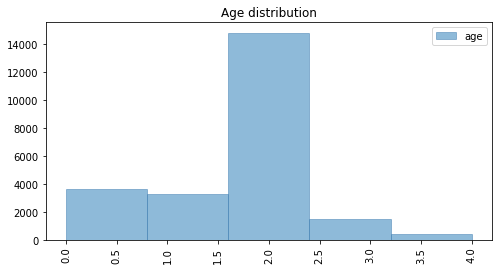

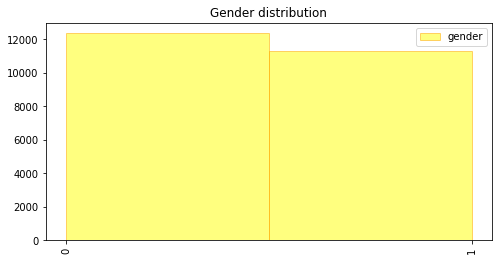

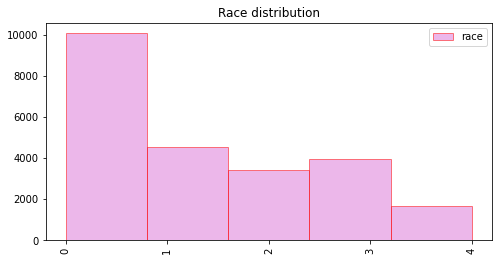

In [113]:
# DISTRIBUTIONS

print('Total number of images in UTK_Face: ' + str(utkface_df.shape[0]))

age = utkface_df["age"].astype(int).sort_values()
age_bins=len(age.value_counts())

gender = utkface_df["gender"].astype(int).sort_values()
gender_bins=len(gender.value_counts())

race = utkface_df["race"].astype(int).sort_values()
race_bins=len(race.value_counts())

age.hist(bins=age_bins, figsize=[8,4], xrot=90, edgecolor='steelblue', linewidth=1, grid=False, alpha=0.5, legend=True)
plt.title('Age distribution')
plt.show()

gender.hist(bins=gender_bins, figsize=[8,4], xrot=90, edgecolor='orange', linewidth=1, grid=False, alpha=0.5, legend=True, color='yellow')
plt.title('Gender distribution')
plt.xticks(np.arange(0, 2, step=1))
plt.show()

race.hist(bins=race_bins, figsize=[8,4], xrot=90, edgecolor='red', linewidth=1, grid=False, alpha=0.5, legend=True, color='orchid')
plt.xticks(np.arange(0, 5, step=1))
plt.title('Race distribution')
plt.show()

In [114]:
# ONE HOT ENCODING

utkface_df = pd.get_dummies(utkface_df, columns=["age", "gender", "race"], dtype=float)
utkface_df.head(5)

,age_0,age_1,age_2,age_3,age_4,gender_0,gender_1,race_0,race_1,race_2,race_3,race_4
100_0_0_20170112213500903.jpg.chip.jpg,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
100_0_0_20170112215240346.jpg.chip.jpg,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
100_1_0_20170110183726390.jpg.chip.jpg,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
100_1_0_20170112213001988.jpg.chip.jpg,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
100_1_0_20170112213303693.jpg.chip.jpg,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [128]:
UTKFACE_JSON_PATH = '/content/A2MF_AP/UTKFace/utkface.json'
utkface_df.to_json(UTKFACE_JSON_PATH, 'index')

In [129]:
# DATASET SPLIT

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(utkface_df, test_size=0.35)

print('Training samples number:', X_train.shape[0])
print('Testing samples number: ', X_test.shape[0])

Training samples number: 15384
Testing samples number:  8285


## Age Race Gender Recognition

Source: https://coursys.sfu.ca/2020sp-cmpt-726-x1/pages/ARG_report/view


In [ ]:
! git clone https://github.com/pagand/CMPT726.git

Cloning into 'CMPT726'...
remote: Enumerating objects: 203, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 203 (delta 42), reused 2 (delta 1), pack-reused 116
Receiving objects: 100% (203/203), 101.86 KiB | 3.64 MiB/s, done.
Resolving deltas: 100% (91/91), done.


Source: https://github.com/Sobika2531/Age-Gender-And-Race-Detection-Using-CNN/blob/main/AGRdetector.ipynb

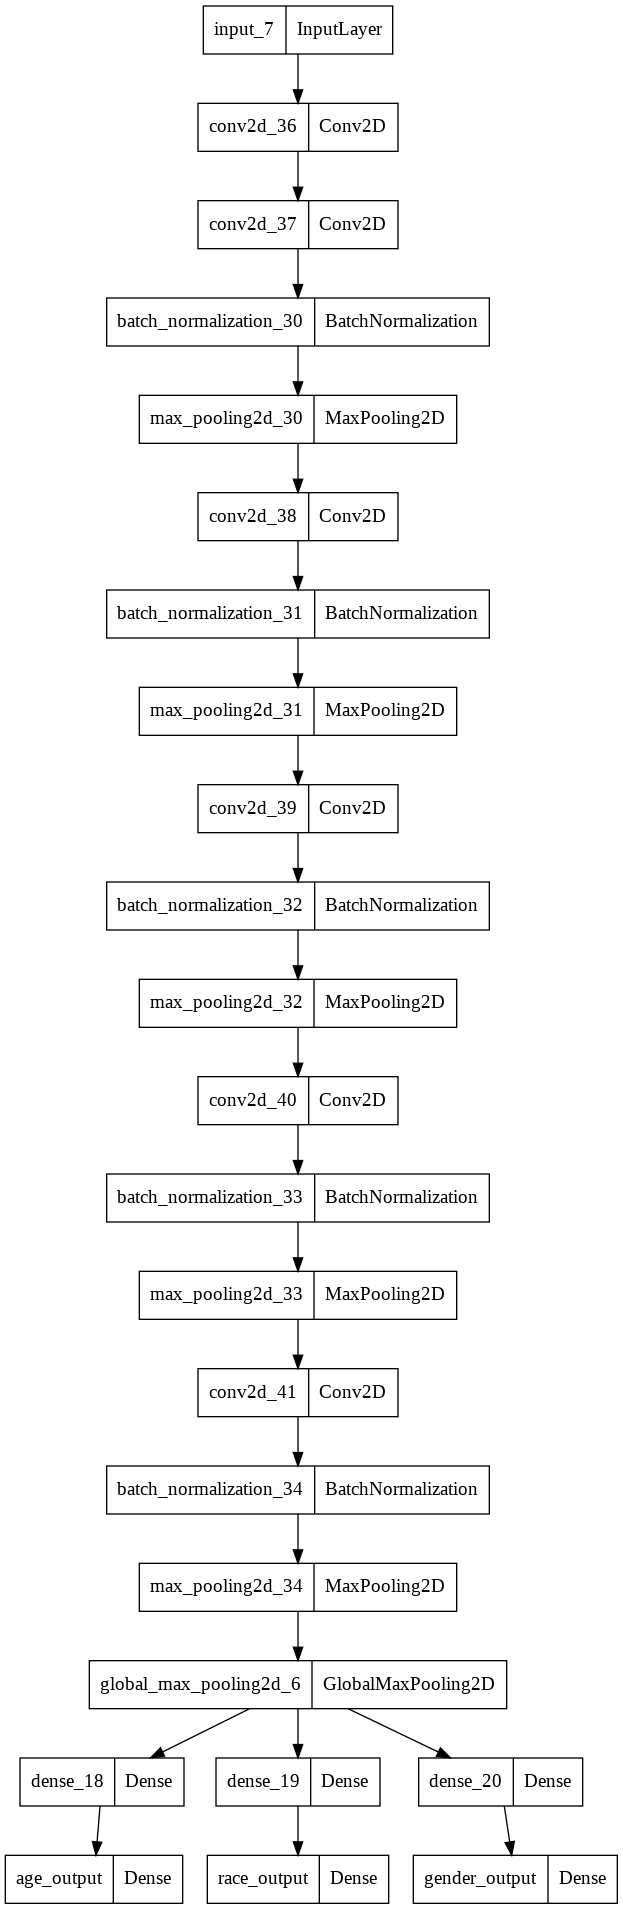

In [ ]:
from keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalMaxPool2D, Dropout
from keras.models import Model
from tensorflow.keras.utils import plot_model


ID_GENDER_MAP = {0: 'male', 1: 'female'}
GENDER_ID_MAP = dict((g, i) for i, g in ID_GENDER_MAP.items())
ID_RACE_MAP = {0: 'white', 1: 'black', 2: 'asian', 3: 'indian', 4: 'others'}
RACE_ID_MAP = dict((r, i) for i, r in ID_RACE_MAP.items())
ID_AGE_MAP = {0: 'children', 1: 'young', 2:'adult', 3:'senior', 4:'old'}
AGE_ID_MAP = dict((a, i) for i, a in ID_AGE_MAP.items())

def conv_block(inp, filters=32, bn=True, pool=True):
    _ = Conv2D(filters=filters, kernel_size=3, activation='relu', padding='same')(inp)
    if bn:
        _ = BatchNormalization()(_)
    if pool:
        _ = MaxPool2D()(_)
    return _

input_layer = Input(shape=(200, 200, 3))
_ = conv_block(input_layer, filters=32, bn=False, pool=False)
_ = conv_block(_, filters=32*2)
_ = conv_block(_, filters=32*3)
_ = conv_block(_, filters=32*4)
_ = conv_block(_, filters=32*5)
_ = conv_block(_, filters=32*6)
bottleneck = GlobalMaxPool2D()(_)

# age no categorical 
#_ = Dense(units=128, activation='relu')(bottleneck)
#age_output = Dense(units=1, activation='sigmoid', name='age_output')(_)


# for age calculation
_ = Dense(units=128, activation='relu')(bottleneck)
age_output = Dense(units=len(AGE_ID_MAP), activation='softmax', name='age_output')(_)

# for race prediction
_ = Dense(units=128, activation='relu')(bottleneck)
race_output = Dense(units=len(RACE_ID_MAP), activation='softmax', name='race_output')(_)

# for gender prediction
_ = Dense(units=128, activation='relu')(bottleneck)
gender_output = Dense(units=len(GENDER_ID_MAP), activation='softmax', name='gender_output')(_)

model = Model(inputs=input_layer, outputs=[age_output, race_output, gender_output])
model.compile(optimizer='rmsprop', 
              loss={'age_output': 'categorical_crossentropy', 'race_output': 'categorical_crossentropy', 'gender_output': 'categorical_crossentropy'},
              loss_weights={'age_output': 1.5, 'race_output': 1.5, 'gender_output': 1.},
              metrics={'age_output': 'accuracy', 'race_output': 'accuracy', 'gender_output': 'accuracy'})
#model.summary()
plot_model(model, "model.png")


In [ ]:
from tensorflow.keras.utils import to_categorical
from PIL import Image
from pathlib import Path

def map_ages(age):
  if age <= 14:
    age = 0.0 # children
  elif age <= 24:
    age = 1.0 # young
  elif age <= 64:
    age = 2.0 # adult
  elif age <= 84:
    age = 3.0 # senior
  else:
    age = 4.0 # old
  return age 


def get_data_generator(df, for_training, batch_size=16):
    images, ages, genders, races = [], [], [], []
    while True:
        for i in range(len(df)):
            r = df.iloc[i]
            file, age, gender, race = r.name, r['age'], r['gender'],  r['race']
            
            path = Path(UTKFACE_PATH, file)
            im = Image.open(str(path))
            # im = im.resize((200, 200))
            im = np.array(im) / 255.0
            age = map_ages(age)
            images.append(im)
            ages.append(to_categorical(age, 5))
            races.append(to_categorical(race, len(RACE_ID_MAP)))
            genders.append(to_categorical(gender, 2))
            if len(images) >= batch_size:
                yield np.array(images), [np.array(ages), np.array(races), np.array(genders)]
                images, ages, races, genders = [], [], [], []
        if not for_training:
            break

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow import keras

batch_size = 16
valid_batch_size = 16
train_gen = get_data_generator(X_train, for_training=True, batch_size=batch_size)
valid_gen = get_data_generator(X_test, for_training=True, batch_size=valid_batch_size)

callbacks = [ModelCheckpoint("/content/drive/MyDrive/AGR_recognition/model_checkpoint", monitor='val_loss')]

history = model.fit(train_gen,
                    epochs=10,
                    steps_per_epoch=64,
                    callbacks=callbacks,
                    validation_data=valid_gen,
                    validation_steps=len(X_test)//valid_batch_size)

Epoch 1/10
64/64 [==============================] - 962s 15s/step - loss: 5.9136 - age_output_loss: 1.4177 - race_output_loss: 1.8054 - gender_output_loss: 1.0790 - age_output_accuracy: 0.5566 - race_output_accuracy: 0.4062 - gender_output_accuracy: 0.5430 - val_loss: 5.3615 - val_age_output_loss: 1.3151 - val_race_output_loss: 1.7386 - val_gender_output_loss: 0.7809 - val_age_output_accuracy: 0.5581 - val_race_output_accuracy: 0.3447 - val_gender_output_accuracy: 0.4483
Epoch 2/10
64/64 [==============================] - 944s 15s/step - loss: 4.7657 - age_output_loss: 1.1454 - race_output_loss: 1.4965 - gender_output_loss: 0.8028 - age_output_accuracy: 0.6211 - race_output_accuracy: 0.4121 - gender_output_accuracy: 0.5527 - val_loss: 5.3797 - val_age_output_loss: 1.3787 - val_race_output_loss: 1.7408 - val_gender_output_loss: 0.7004 - val_age_output_accuracy: 0.6333 - val_race_output_accuracy: 0.4284 - val_gender_output_accuracy: 0.5455
Epoch 3/10
64/64 [==============================

Source: https://github.com/wondonghyeon/face-classification/blob/master/train.ipynb

In [ ]:
# MLP CLASSIFIER 
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', hidden_layer_sizes=(128, 128),max_iter = 5000, verbose=True, tol=1e-4, activation='relu')
clf.fit(X_train)
pred = clf.predict(X_test)
score = clf.predict_proba(X_test)

df_pred = pd.DataFrame(pred, columns=df_label.columns, index=Y_test.index)
df_score = pd.DataFrame(score, columns=df_label.columns, index=Y_test.index)

Provare il classificatore MLP

## PGAN

In [130]:
%cd /content/A2MF_AP/UTKFace

/content/A2MF_AP/UTKFace


In [131]:
content = { 
    "pathDB": UTKFACE_PATH, 
    "pathAttribDict": UTKFACE_LABELS_PATH,
    "config": {
        "maxIterAtScale": [48000, 96000, 96000, 96000, 96000, 96000, 200000], 
        "depthScales": [256, 256, 256, 128, 64, 32, 16]
        }
    }

with open('utkface_config.json', 'w') as outfile:
    json.dump(content, outfile)

In [132]:
%cd /content/pytorch_GAN_zoo/
!pip install -r /content/pytorch_GAN_zoo/requirements.txt

/content/pytorch_GAN_zoo


In [133]:
!python train.py --np_vis PGAN -c /content/A2MF_AP/UTKFace/utkface_config.json -n 'utkface_visible' --restart -d /content/drive/MyDrive/checkpoints

Running PGAN
size 10
23672 images found
AC-GAN classes : 
{'age': {'order': 0, 'values': [0, 1, 2, 3, 4]}, 'gender': {'order': 1, 'values': [0, 1]}, 'race': {'order': 2, 'values': [0, 1, 2, 3, 4]}}

size 10
23672 images found
23672 images detected
size (4, 4)
23672 images found
Changing alpha to 0.000
/pytorch/aten/src/ATen/native/cuda/Loss.cu:455: nll_loss_backward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [2,0,0] Assertion `t >= 0 && t < n_classes` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:455: nll_loss_backward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [4,0,0] Assertion `t >= 0 && t < n_classes` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:455: nll_loss_backward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [5,0,0] Assertion `t >= 0 && t < n_classes` failed.
/pytorch/aten/src/ATen/native/cuda/Loss.cu:455: nll_loss_backward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [8,0,0] Assertion `t >= 0 && t < n_classes` failed.
/pytorch/aten/src/ATen/native/cuda/Lo